In [2]:
import pandas as pd
import numpy as np

In [3]:
matches = pd.read_csv("C:/Users/prana/Working directory/Projects repository/data-science/Tennis-prediction/data/atp_tennis.csv")
matches.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [4]:
matches.shape

(65528, 17)

In [5]:
matches["date"] = pd.to_datetime(matches["Date"])
matches.dtypes

Tournament            object
Date                  object
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Player_1              object
Player_2              object
Winner                object
Rank_1                 int64
Rank_2                 int64
Pts_1                  int64
Pts_2                  int64
Odd_1                float64
Odd_2                float64
Score                 object
date          datetime64[ns]
dtype: object

In [6]:
# Create a new column representing the Indoor or Outdoor value
matches["courtType"] = matches["Court"].astype("category").cat.codes

# Create a new column representing the kind of surface
matches["groundType"] = matches["Surface"].astype("category").cat.codes

# Create a new column representing a code for each opponent
matches["opponentCode"] = matches["Player_2"].astype("category").cat.codes

# Create a new column representing a code for each opponent
matches["playerCode"] = matches["Player_1"].astype("category").cat.codes


# Create a new column representing if the player1 won the game with a 1 or if it didn't with a 0
matches["target"] = (matches["Winner"] == matches["Player_1"]).astype("int")

In [7]:
matches

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Pts_2,Odd_1,Odd_2,Score,date,courtType,groundType,opponentCode,playerCode,target
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,...,-1,-1.00,-1.00,6-4 6-2,2000-01-03,1,3,764,331,1
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,...,-1,-1.00,-1.00,3-6 3-6,2000-01-03,1,3,365,237,0
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,...,-1,-1.00,-1.00,6-7 7-5 6-3,2000-01-03,1,3,63,373,1
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,...,-1,-1.00,-1.00,1-6 4-6,2000-01-03,1,3,388,674,0
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,...,-1,-1.00,-1.00,7-6 5-7 6-4,2000-01-03,1,3,1428,423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65523,Queen's Club Championships,2025-06-20,ATP500,Outdoor,Grass,Quarterfinals,3,Rinderknech A.,Alcaraz C.,Alcaraz C.,...,8850,6.50,1.12,5-7 4-6,2025-06-20,1,2,17,1106,0
65524,Queen's Club Championships,2025-06-20,ATP500,Outdoor,Grass,Quarterfinals,3,Bautista Agut R.,Rune H.,Bautista Agut R.,...,3440,3.40,1.33,7-6 6-7 6-2,2025-06-20,1,2,1130,80,1
65525,Queen's Club Championships,2025-06-21,ATP500,Outdoor,Grass,Semifinals,3,Draper J.,Lehecka J.,Lehecka J.,...,1645,1.45,2.63,4-6 6-4 5-7,2025-06-21,1,2,748,333,0
65526,Queen's Club Championships,2025-06-21,ATP500,Outdoor,Grass,Semifinals,3,Alcaraz C.,Bautista Agut R.,Alcaraz C.,...,1049,1.10,7.00,6-4 6-4,2025-06-21,1,2,89,17,1


In [8]:
matches.to_csv("../data/t-1_cleaned_data.csv")

In [9]:
# Training the machine learning model 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 3, random_state = 1)

# Divide the dataset into train and test sections
conditionDate = matches['date'] > '2005-01-01'
conditionDate2 = matches['date'] < '2023-10-29'
combinedCondition = conditionDate & conditionDate2 
train = matches[combinedCondition]

test = matches[matches["date"] > '2023-10-29']

# A list of all the prdictors 
predictors = ["playerCode", "opponentCode", "Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2"]

# Fit the random forest model, fitting the predictors and trying to predict the target
rf.fit(train[predictors], train["target"])

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


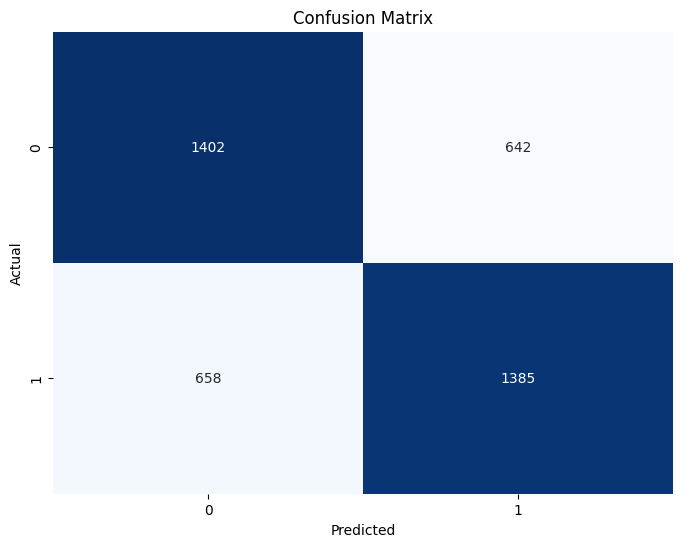

In [10]:
prediction = rf.predict(test[predictors])

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['target'], prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
probabilities = rf.predict_proba(test[predictors])
probabilities

array([[0.66666667, 0.33333333],
       [0.51083333, 0.48916667],
       [0.3997619 , 0.6002381 ],
       ...,
       [0.3       , 0.7       ],
       [0.09375   , 0.90625   ],
       [0.785     , 0.215     ]])

In [12]:
firstPlayer = "Murray A."
firstOpponent = "Paire B."

rows = matches.loc[matches["Player_1"] == firstPlayer, "playerCode"]
if not rows.empty:
    print("ID for PLAYER:", firstPlayer)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

rows = matches.loc[matches["Player_2"] == firstOpponent, "opponentCode"]
if not rows.empty:
    print("ID for OPPONENT:", firstOpponent)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

# Change the Player and opponent 
print(" ")
print("CHANGE OF PLAYERS")
print(" ")

secondPlayer = firstOpponent
secondOpponent = firstPlayer
    
rows = matches.loc[matches["Player_1"] == secondPlayer, "playerCode"]
if not rows.empty:
    print("ID for PLAYER:", secondPlayer)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

rows = matches.loc[matches["Player_2"] == secondOpponent, "opponentCode"]
if not rows.empty:
    print("ID for OPPONENT:", secondOpponent)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")


ID for PLAYER: Murray A.
937
ID for OPPONENT: Paire B.
993
 
CHANGE OF PLAYERS
 
ID for PLAYER: Paire B.
1008
ID for OPPONENT: Murray A.
922


In [13]:
# First Data
firstPlayerCode = 892
firstOpponentCode = 954
firstPlayerRank = 49
firstPlayerPoints = 970
firstPlayerOdds = 1.30

# Second Data
secondPlayerCode = 959
secondOpponentCode = 885
secondPlayerRank = 112
secondPlayerPoints = 551
secondPlayerOdds = 2.60

firstData = {
    "playerCode": firstPlayerCode,
    "opponentCode": firstOpponentCode,
    "Rank_1": firstPlayerRank, 
    "Rank_2": secondPlayerRank, 
    "Pts_1": firstPlayerPoints, 
    "Pts_2": secondPlayerPoints, 
    "Odd_1": firstPlayerOdds, 
    "Odd_2": secondPlayerOdds
}

secondData = {
    "playerCode": secondPlayerCode,
    "opponentCode": secondOpponentCode,
    "Rank_1": secondPlayerRank, 
    "Rank_2": firstPlayerRank, 
    "Pts_1": secondPlayerPoints, 
    "Pts_2": firstPlayerPoints, 
    "Odd_1": secondPlayerOdds, 
    "Odd_2": firstPlayerOdds
}


# Convert firstData to a DataFrame with a single row
firstData_df = pd.DataFrame([firstData])
secondData_df = pd.DataFrame([secondData])

# Extract predictors in the same order as used during training
firstDataInput = firstData_df[predictors]
secondDataInput = secondData_df[predictors]

# Make predictions
prediction = rf.predict(firstDataInput)


# Make a prediction on the new data
print(f"{firstPlayer} win result is: {prediction[0]}")
prediction = rf.predict(secondDataInput)
print(f"{secondPlayer} win result is: {prediction[0]}")

Murray A. win result is: 1
Paire B. win result is: 0


In [14]:
probabilityPlayerOne = rf.predict_proba(firstDataInput)
print(f"{firstPlayer} probability is: {probabilityPlayerOne}")

probabilityPlayerTwo = rf.predict_proba(secondDataInput)
print(f"{secondPlayer} probability is: {probabilityPlayerTwo}")

Murray A. probability is: [[0.33708333 0.66291667]]
Paire B. probability is: [[0.74666667 0.25333333]]


In [15]:
probabilityPlayerOne.shape

(1, 2)

In [16]:
confidence = ((probabilityPlayerOne[0, 1] + probabilityPlayerTwo[0, 0]) / 2)
confidence

np.float64(0.7047916666666666)

In [17]:
# Generate prediction, passing the test data and the predictors
preds = rf.predict(test[predictors])

# Need to describe the accuracy
from sklearn.metrics import accuracy_score

# Calculate the accuracy passing the test data, with the predictors and the prediction
acc = accuracy_score(test["target"], preds)

In [18]:
acc

0.6819182774651333

In [19]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [20]:
import joblib

with open('rf_model.joblib', 'wb') as f:
    joblib.dump(rf, f)

